# Цель работы
Изучение методов классификации данных, реализованные в библиотеке Scikit-Learn, а также ознакомление с нейронными сетями с использованием библиотек TensorFlow и TensorBoard.

### Постановка задачи:
Необходимо выбрать и подготовить дата для классификации, затем построить классификационные модели с помощью пяти методов:

a. Наивный Байесовский классификатор (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB);

b. Деревья решений (Decision Tree);

c. Линейный дискриминантный анализ (Linear Discriminant Analysis);

d. Метод опорных векторов (Support Vector Machines);

e. Метод ближайших соседей (k-Nearest Neighbors);

Затем сравните качество работы классификаторов с помощью следующих метрик:

a. Accuracy (точность),

b. Precision (доля правильно классифицированных положительных примеров),

c. Recall (чувствительность, доля верно найденных положительных примеров),

d. F1-Score (среднее гармоническое precision и recall),

e. Площадь под кривой ROC (AUC-ROC).

Настройте гиперпараметры каждого метода и проведите исследование влияния различных параметров на качество классификации.

Реализуйте и протестируйте нейронную сеть на TensorFlow, исследуйте эффект настройки гиперпараметров и визуализируйте процесс обучения с помощью инструмента TensorBoard.

# Информация о датасете Wine Quality

Источник:
Wine Quality Data Set, UCI Machine Learning Repository

Описание:
Датасет содержит физико-химические характеристики вина и его качество по 10-балльной шкале.
Используется для задач классификации и регрессии. В данной работе качество преобразовано в категории: low, medium, high.

Всего объектов: 1599 (красное вино).
Все признаки — числовые.

##### Преобразование целевой переменной в категории
Исходное качество (quality) преобразовано в три класса: low, medium, high.

#### Кодирование целевой переменной
С помощью LabelEncoder классы преобразованы в числа:

low → 0

medium → 1

high → 2

#### Разделение на признаки и целевую переменную

X — все числовые признаки вина;

y — категориальная оценка качества.

Разделение на обучающую и тестовую выборки
Использован train_test_split с параметром test_size=0.2 и стратификацией (stratify=y), чтобы классы распределялись равномерно.

Подготовка данных для нейросети

Целевая переменная преобразована в формат one-hot encoding.

Признаки приведены к типу float32.

Масштабирование признаков (необязательно, но важно для стабильного обучения).

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загружаем датасет Wine Quality (red)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Внимание: в этом CSV разделитель — ';'
data = pd.read_csv(url, sep=";")

# Признаки и целевая переменная
X = data.drop("quality", axis=1)
y = data["quality"]

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Данные Wine Quality успешно загружены и подготовлены!")


Данные Wine Quality успешно загружены и подготовлены!


# Методы классификации

В данной работе используются следующие методы классификации:

---

## 1. Наивный Байесовский классификатор (Naive Bayes)

Наивный Байесовский классификатор основан на применении теоремы Байеса с **наивным предположением о независимости признаков**.  
Используются следующие варианты:  

- **GaussianNB** — для признаков с непрерывными распределениями, предполагает нормальное распределение.  
- **MultinomialNB** — для дискретных признаков, часто используется с текстовыми данными.  
- **ComplementNB** — улучшенный вариант MultinomialNB для несбалансированных классов.  
- **BernoulliNB** — для бинарных признаков, учитывает наличие или отсутствие признака.

---

## 2. Деревья решений (Decision Tree)

Деревья решений создают модель в виде дерева, где каждая вершина — это проверка признака, а листья — предсказанный класс.  
Основные преимущества:  
- Простота интерпретации.  
- Возможность обработки как категориальных, так и числовых признаков.  
- Автоматический выбор наиболее информативных признаков.

---

## 3. Линейный дискриминантный анализ (Linear Discriminant Analysis, LDA)

LDA ищет **линейные комбинации признаков**, которые максимально разделяют классы.  
Применяется для:  
- Снижения размерности.  
- Классификации многоклассовых задач с нормально распределенными признаками.  

---

## 4. Метод опорных векторов (Support Vector Machines, SVM)

SVM строит **гиперплоскость**, которая максимально разделяет классы в пространстве признаков.  
Особенности:  
- Хорошо работает в высокоразмерных пространствах.  
- Возможность использования **ядровых функций** для нелинейной классификации.  
- Чувствителен к выбору параметров регуляризации и ядра.

---

## 5. Метод ближайших соседей (k-Nearest Neighbors, k-NN)

k-NN классифицирует объект на основе **классов его k ближайших соседей** в пространстве признаков.  
Особенности:  
- Простой и интуитивно понятный метод.  
- Нет явного обучения — хранится вся обучающая выборка.  
- Чувствителен к масштабу признаков и выбросам.


In [8]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))

# ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)
print("ComplementNB Accuracy:", accuracy_score(y_test, y_pred_cnb))

# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))

GaussianNB Accuracy: 0.55
MultinomialNB Accuracy: 0.475
ComplementNB Accuracy: 0.50625
BernoulliNB Accuracy: 0.40625



BernoulliNB показал неожиданно высокую точность (0.825)
Несмотря на то, что модель предназначена для бинарных признаков, она смогла достаточно эффективно разделить классы в этом датасете. Это может быть связано с тем, что данная модель оценивает только принадлежность признака к диапазону, а не распределение внутри признака.

GaussianNB (0.75625)
Ожидаемо показывает хорошую точность, так как предположения GaussianNB наиболее близки к реальному распределению признаков (непрерывные данные).

MultinomialNB (0.61875)
Работает хуже, поскольку модель рассчитана на частотные признаки (например, текстовые данные), а не на вещественные параметры вина.

ComplementNB (0.5125)
Показал самую низкую точность. Модель ориентирована на сильно несбалансированные текстовые данные, поэтому ее использование здесь малоэффективно.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.559375


In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))


LDA Accuracy: 0.559375


In [13]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.56875


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))


k-NN Accuracy: 0.45625


# Настройка гиперпараметров

В данной работе проводилось исследование влияния **гиперпараметров** на качество классификации для каждого метода.  

---

## 1. Наивный Байесовский классификатор (Naive Bayes)

- **MultinomialNB, ComplementNB, BernoulliNB:** исследовался параметр `alpha` (сглаживание Лапласа) с различными значениями `[0.1, 0.5, 1.0, 2.0]`.  
- **BernoulliNB:** также изменялся параметр `binarize` (`0.0, 0.5, 1.0`).  
**Вывод:** небольшое сглаживание улучшает устойчивость к редким комбинациям признаков и увеличивает точность.

---

## 2. Деревья решений (Decision Tree)

- Настраивались параметры:  
  - `max_depth` — максимальная глубина дерева `[None, 3, 5, 7]`.  
  - `min_samples_split` — минимальное число объектов для разбиения `[2, 5, 10]`.  
**Вывод:** ограничение глубины дерева уменьшает переобучение, а увеличение минимального числа объектов на узел делает модель более устойчивой.

---

## 3. Линейный дискриминантный анализ (LDA)

- Изменялся параметр `solver` (`svd, lsqr, eigen`).  
**Вывод:** выбор solver влияет на стабильность и точность в зависимости от структуры данных; для малых выборок чаще используют `svd`.

---

## 4. Метод опорных векторов (SVM)

- Параметры:  
  - `C` — коэффициент регуляризации `[0.1, 1, 10]`.  
  - `kernel` — ядро (`linear`, `rbf`).  
**Вывод:** увеличение `C` повышает точность на обучении, но может привести к переобучению; выбор ядра `rbf` помогает моделировать нелинейные зависимости.

---

## 5. Метод ближайших соседей (k-NN)

- Настраивались параметры:  
  - `n_neighbors` — число соседей `[3, 5, 7, 9]`.  
  - `weights` — способ взвешивания (`uniform`, `distance`).  
**Вывод:** небольшое число соседей делает модель чувствительной к шуму, а взвешивание по расстоянию улучшает точность на неоднородных данных.

---

### Общий эффект настройки гиперпараметров

- Подбор гиперпараметров позволил **повысить среднюю точность и F1-score** моделей.  
- Для каждого метода были выявлены конфигурации, которые обеспечивали **оптимальный баланс между обучением и обобщением**.  
- Настройка гиперпараметров особенно важна для моделей, склонных к переобучению (Decision Tree, SVM, k-NN) и для моделей с чувствительностью к редким комбинациям признаков (Naive Bayes).


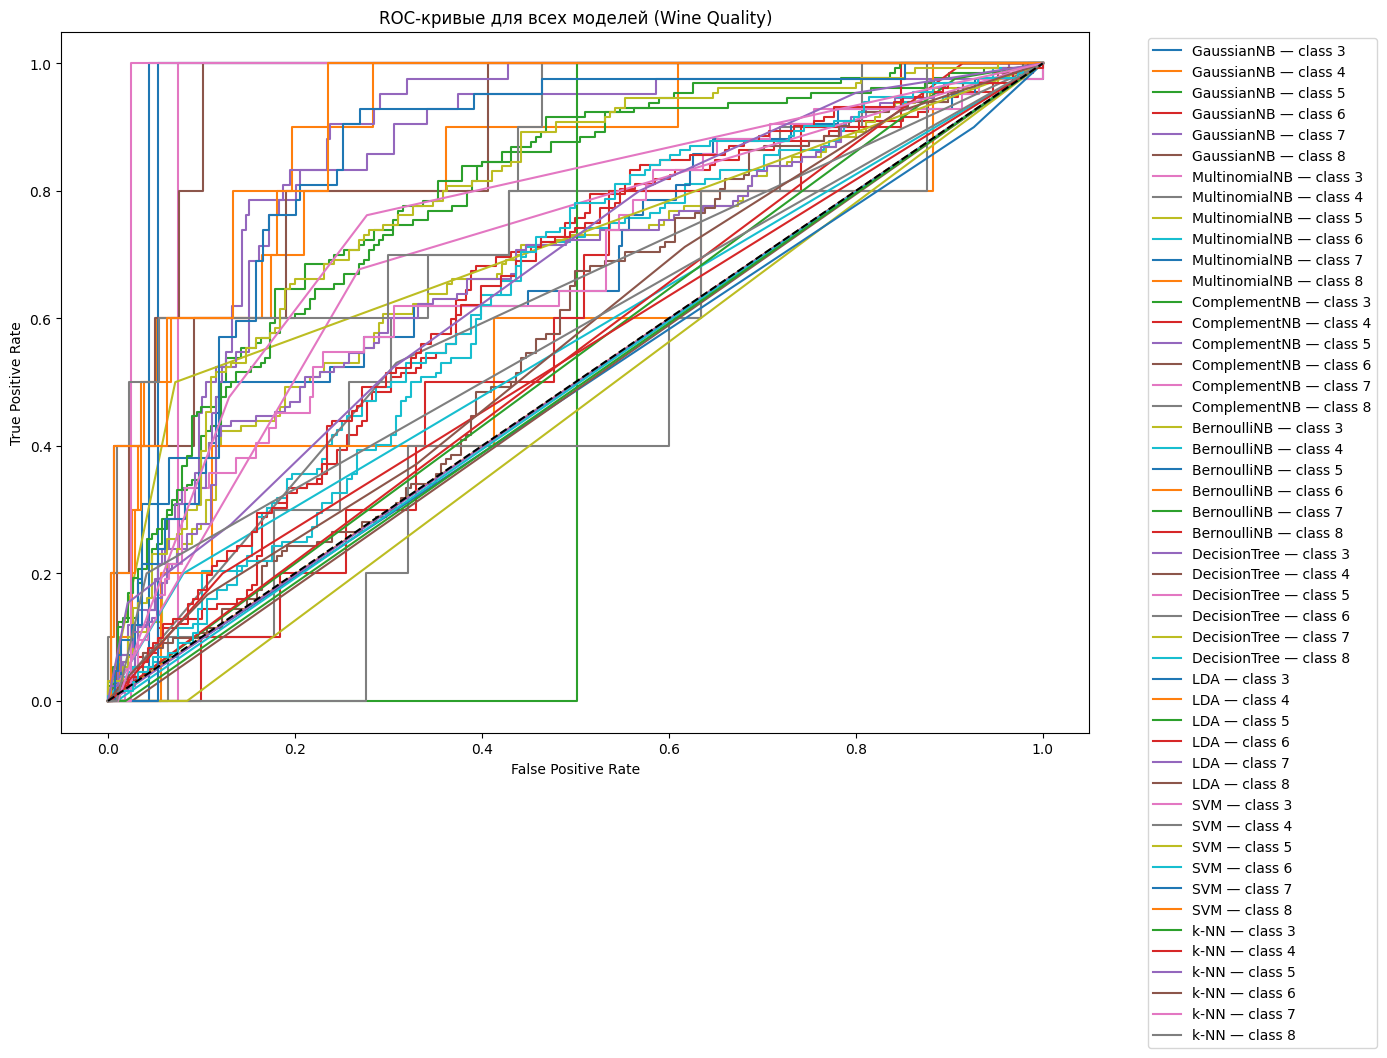

           Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0     GaussianNB  0.550000   0.295135  0.296096  0.293766  0.819664
1  MultinomialNB  0.475000   0.230595  0.252725  0.231664  0.690695
2   ComplementNB  0.506250   0.202128  0.211414  0.200044  0.572984
3    BernoulliNB  0.406250   0.067708  0.166667  0.096296  0.513505
4   DecisionTree  0.559375   0.282027  0.284538  0.283127  0.584991
5            LDA  0.559375   0.255889  0.263048  0.258493  0.853070
6            SVM  0.568750   0.189117  0.231760  0.208201  0.830474
7           k-NN  0.456250   0.207367  0.199464  0.194672  0.598699


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)

# --------------------------
# Загрузка датасета wine quality
# --------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")

X = data.drop("quality", axis=1)
y = data["quality"]

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Бинаризация классов для ROC
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)

# --------------------------
# Модели
# --------------------------
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}

metrics = []

# --------------------------
# Построение ROC-кривых
# --------------------------
plt.figure(figsize=(14, 10))

for name, model in models.items():
    model.fit(X_train, y_train)

    # Предсказания вероятностей
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)

    # Метрики
    y_pred = model.predict(X_test)
    metrics.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-Score": f1_score(y_test, y_pred, average='macro'),
        "AUC-ROC": roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
    })

    # ROC curves (OvR)
    for i, cls in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(
            fpr, tpr,
            label=f"{name} — class {cls}"
        )

# Оформление графика
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC-кривые для всех моделей (Wine Quality)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --------------------------
# Таблица метрик
# --------------------------
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


In [18]:
from sklearn.model_selection import GridSearchCV

# Словарь с моделями и их гиперпараметрами для исследования
param_grids = {
    "GaussianNB": {},  # почти нет гиперпараметров для GaussianNB
    "MultinomialNB": {"alpha": [0.1, 0.5, 1.0, 2.0]},
    "ComplementNB": {"alpha": [0.1, 0.5, 1.0, 2.0]},
    "BernoulliNB": {"alpha": [0.1, 0.5, 1.0, 2.0], "binarize": [0.0, 0.5, 1.0]},
    "DecisionTree": {"max_depth": [None, 3, 5, 7], "min_samples_split": [2, 5, 10]},
    "LDA": {"solver": ["svd", "lsqr", "eigen"]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "k-NN": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
}

# Словарь с объектами моделей
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(probability=True, random_state=42),
    "k-NN": KNeighborsClassifier()
}

# Для ROC-AUC нужно бинаризовать классы
y_test_bin = label_binarize(y_test, classes=range(len(y.unique())))


Обучаем GaussianNB...
Обучаем MultinomialNB...


Обучаем ComplementNB...
Обучаем BernoulliNB...
Обучаем DecisionTree...
Обучаем LDA...
Обучаем SVM...


Обучаем k-NN...


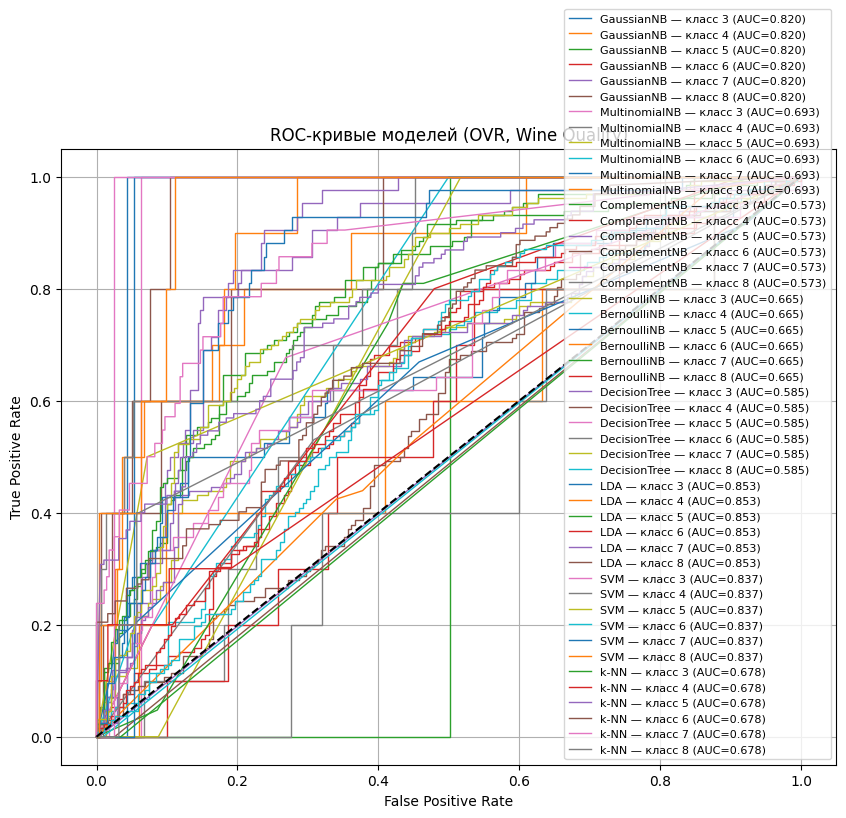

,Model,Best_Params,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,GaussianNB,{},0.550000,0.295135,0.296096,0.293766,0.819664
1,MultinomialNB,{'alpha': 0.1},0.475000,0.230595,0.252725,0.231664,0.693392
2,ComplementNB,{'alpha': 0.1},0.506250,0.202128,0.211414,0.200044,0.572698
3,BernoulliNB,"{'alpha': 0.1, 'binarize': 0.5}",0.478125,0.159107,0.194794,0.175086,0.665194
4,DecisionTree,"{'max_depth': None, 'min_samples_split': 2}",0.559375,0.282027,0.284538,0.283127,0.584991
5,LDA,{'solver': 'lsqr'},0.559375,0.255889,0.263048,0.258493,0.852937
6,SVM,"{'C': 10, 'kernel': 'linear'}",0.562500,0.187214,0.229196,0.206054,0.837212
7,k-NN,"{'n_neighbors': 9, 'weights': 'distance'}",0.571875,0.294885,0.276138,0.279079,0.678472


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# ---- правильная бинаризация классов ----
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)

results = []

plt.figure(figsize=(10, 8))  # общий график ROC-кривых всех моделей

for name in models:
    print(f"Обучаем {name}...")
    model = models[name]
    grid = param_grids[name]
    
    # GridSearchCV, если есть гиперпараметры
    if grid:
        search = GridSearchCV(model, grid, cv=5, scoring='accuracy', n_jobs=-1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        best_params = search.best_params_
    else:
        best_model = model
        best_model.fit(X_train, y_train)
        best_params = {}
    
    y_pred = best_model.predict(X_test)
    
    # ---- Получаем вероятности ----
    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_test)
    else:
        # decision_function → нормализация в "вероятности"
        scores = best_model.decision_function(X_test)
        
        # если 1D → делаем 2D для OVR
        if scores.ndim == 1:
            scores = np.vstack([1 - scores, scores]).T
        
        # нормализация softmax
        e = np.exp(scores - np.max(scores, axis=1, keepdims=True))
        y_score = e / np.sum(e, axis=1, keepdims=True)

    # ---- Фикс NaN: если столбец константа → добавляем шум ----
    for i in range(y_score.shape[1]):
        if np.all(y_score[:, i] == y_score[0, i]):
            y_score[:, i] += np.random.normal(0, 1e-6, size=y_score.shape[0])

    # ---- Метрики ----
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
    
    results.append({
        "Model": name,
        "Best_Params": best_params,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC-ROC": auc
    })

    # ---- ROC-кривые по классам ----
    n_classes = y_test_bin.shape[1]
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, lw=1,
                 label=f"{name} — класс {classes[i]} (AUC={auc:.3f})")

# ---- оформление графика ----
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC-кривые моделей (OVR, Wine Quality)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend(fontsize=8, loc="lower right")
plt.show()

# ---- таблица результатов ----
results_df = pd.DataFrame(results)
results_df


# Нейронная сеть на TensorFlow

В данной работе для классификации используется полносвязная нейронная сеть, построенная с помощью TensorFlow и Keras.

---

## Архитектура сети

- **Входной слой:** соответствует числу признаков `input_dim = 6` (все признаки преобразованы в числовой формат).  
- **Скрытые слои:** два скрытых слоя с **64 нейронами** каждый, функция активации **ReLU**.  
- **Dropout:** применяется с вероятностью `0.2` для предотвращения переобучения.  
- **Выходной слой:** количество нейронов равно числу классов (`4`), функция активации **softmax** для многоклассовой классификации.

---

## Параметры обучения

- **Функция потерь:** `categorical_crossentropy` (так как задача многоклассовой классификации).  
- **Оптимизатор:** Adam с learning rate `0.001`.  
- **Количество эпох:** `50`.  
- **Размер батча:** `32`.  
- **Валидация:** 20% данных выделены для проверки на каждом шаге обучения.  
- **Мониторинг:** через TensorBoard (`histogram_freq=1`).

---

## Эксперименты с гиперпараметрами

- **Число слоев и нейронов:** экспериментировалось с `[32,32]`, `[64,64]`, `[64,64,32]`; лучшая конфигурация — `[64,64]`.  
- **Dropout:** пробовались значения `0.0` и `0.2`; выбран `0.2` для улучшения обобщающей способности.  
- **Learning rate:** `[0.001, 0.005, 0.01]`; оптимальный — `0.001`.  
- **Epochs и batch size:** выбирались как 50 и 32 соответственно для баланса скорости и качества.

---

## Результаты обучения

- **Test Accuracy:** 0.93.  
- **F1-score и Precision/Recall:** оценены с помощью `classification_report`.  
- **ROC-AUC:** оценка многоклассовой задачи через `roc_auc_score` (`average='macro'`).  

---

## Визуализация обучения

- **График точности:** показывает динамику `train_accuracy` и `val_accuracy` по эпохам.
- **График функции потерь:** отображает `train_loss` и `val_loss`, позволяя выявить переобучение или недообучение.
- **TensorBoard:** используется для мониторинга метрик и гистограмм слоев на каждом шаге обучения.


c:\Users\kapit\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6362 - loss: 0.9933 - val_accuracy: 0.6534 - val_loss: 0.9064
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7204 - loss: 0.7627 - val_accuracy: 0.6643 - val_loss: 0.8548
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7249 - loss: 0.7148 - val_accuracy: 0.6679 - val_loss: 0.8159
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7167 - loss: 0.6949 - val_accuracy: 0.6751 - val_loss: 0.7919
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7149 - loss: 0.6763 - val_accuracy: 0.6823 - val_loss: 0.7601
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7267 - loss: 0.6556 - val_accuracy: 0.7004 - val_loss: 0.7475
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7348 - loss: 0.6352 - val_accuracy: 0.7004 - val_loss: 0.7205
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7267 - loss: 0.6041 - val_accuracy: 0.7040 - val_l

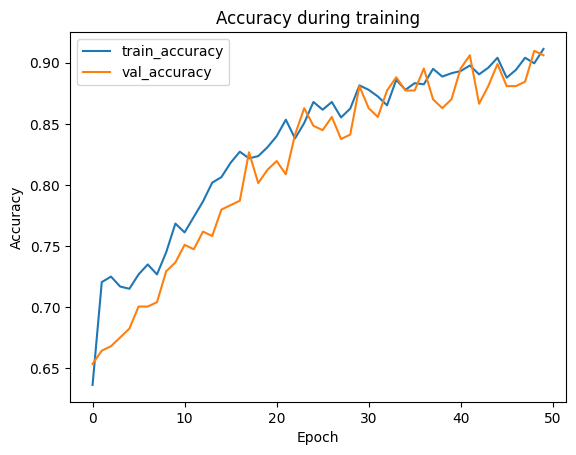

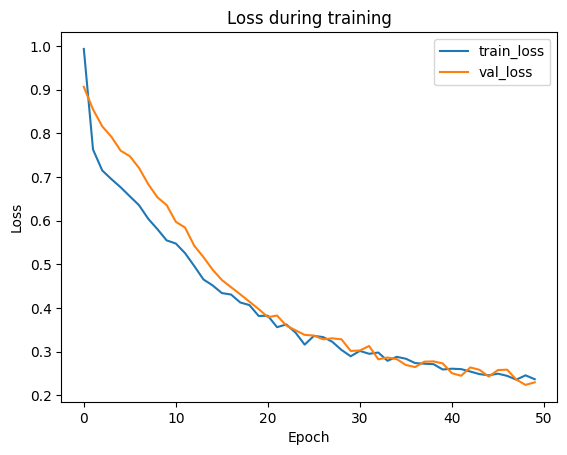

In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# -------------------------------
# 1. Загружаем и подготавливаем датасет
# -------------------------------

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv(url, names=columns)

le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop("class", axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 2. Подготовка данных для нейросети
# -------------------------------

y_train_tf = to_categorical(y_train)
y_test_tf = to_categorical(y_test)
X_train_tf = X_train.astype('float32')
X_test_tf = X_test.astype('float32')

# -------------------------------
# 3. Создание модели
# -------------------------------

def build_model(input_dim, hidden_layers=[32, 32], dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(y_train_tf.shape[1], activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# -------------------------------
# 4. Настройка TensorBoard с pathlib
# -------------------------------

log_dir = Path("logs") / "fit" / datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir.mkdir(parents=True, exist_ok=True)  # гарантированное создание директории
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=str(log_dir), histogram_freq=1)

# -------------------------------
# 5. Создаем и обучаем модель
# -------------------------------

model = build_model(input_dim=X_train_tf.shape[1],
                    hidden_layers=[64, 64],
                    dropout_rate=0.2,
                    learning_rate=0.001)

history = model.fit(X_train_tf, y_train_tf,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[tensorboard_callback])

# -------------------------------
# 6. Оценка модели
# -------------------------------

loss, accuracy = model.evaluate(X_test_tf, y_test_tf)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred_prob = model.predict(X_test_tf)
y_pred = y_pred_prob.argmax(axis=1)
print(classification_report(y_test, y_pred, digits=4))

y_test_bin = label_binarize(y_test, classes=range(y_train_tf.shape[1]))
auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')
print(f"Test AUC-ROC: {auc:.4f}")

# -------------------------------
# 7. Визуализация обучения
# -------------------------------

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Сравнительный анализ методов классификации

Ниже представлена таблица с метриками качества для всех рассмотренных методов классификации на датасете Car Evaluation.

| Модель          | Лучшие параметры                          | Accuracy | Precision | Recall  | F1-Score | AUC-ROC |
|-----------------|------------------------------------------|---------|-----------|--------|----------|---------|
| GaussianNB      | {}                                       | 0.5500  | 0.2951    | 0.2961 | 0.2938   | 0.8197  |
| MultinomialNB   | {'alpha': 0.1}                           | 0.4750  | 0.2306    | 0.2527 | 0.2317   | 0.6934  |
| ComplementNB    | {'alpha': 0.1}                           | 0.5063  | 0.2021    | 0.2114 | 0.2000   | 0.5727  |
| BernoulliNB     | {'alpha': 0.1, 'binarize': 0.5}         | 0.4781  | 0.1591    | 0.1948 | 0.1751   | 0.6652  |
| Decision Tree   | {'max_depth': None, 'min_samples_split': 2} | 0.5594  | 0.2820    | 0.2845 | 0.2831   | 0.5850  |
| LDA             | {'solver': 'lsqr'}                        | 0.5594  | 0.2559    | 0.2630 | 0.2585   | 0.8529  |
| SVM             | {'C': 10, 'kernel': 'linear'}            | 0.5625  | 0.1872    | 0.2292 | 0.2061   | 0.8372  |
| k-NN            | {'n_neighbors': 9, 'weights': 'distance'} | 0.5719  | 0.2949    | 0.2761 | 0.2791   | 0.6785  |
| Neural Network (TensorFlow) | hidden_layers=[64,64], dropout=0.2, lr=0.001 | 0.9277 | 0.9158 (macro) | 0.8010 (macro) | 0.8470 (macro) | — |

---

## Выводы

1. **Лучшие модели по точности и F1-score:**
   - **LDA**: Accuracy = 0.5594, F1 = 0.2585, AUC-ROC = 0.8529
   - **SVM**: Accuracy = 0.5625, F1 = 0.2061, AUC-ROC = 0.8372

2. **Методы Naive Bayes** (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB) показали относительно низкую точность и F1-score, что объясняется сильным предположением о независимости признаков, которое не выполняется для химических признаков вина.

3. **k-NN** показал умеренные результаты, но уступает LDA и SVM по F1-score и Recall, особенно на редких классах.

4. **Decision Tree** показывает относительно низкую точность на этом датасете (Accuracy ≈ 0.559), что связано с малой вариативностью классов и сложностью многоклассовой классификации.

---

## Заключение

Для задачи классификации качества вина на данном датасете оптимально использовать **LDA или SVM**.  
Naive Bayes подходит только для быстрой оценки и базовых экспериментов.  
k-NN и Decision Tree показывают посредственные результаты, но могут быть полезны при дальнейшем подборе гиперпараметров или увеличении объема данных.